## Before diving into portfolio optimization or machine learning algorithms, it's important to explore and visualize your finance data to better understand it.

### Python provides a multitude of libraries to help better understand various stock performances over time and analyze possible trends.

In [2]:
#Importing the yahoo finance library to import historical stock data
#Importing popular data analysis and visualization libraries
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Using yfinance to read in 5 years of daily closing prices for 5 of my personal stocks and the S&P500
tickersList = ['AMZN', 'ENPH', 'TSLA', 'ETSY', 'TDOC', 'SPY']
stockDF = pdr.get_data_yahoo(tickersList, start = '2016-01-15', end = '2021-01-16')['Adj Close']
stockDF.reset_index(inplace = True)

#It should already be in ascending order by date but using sort_values to confirm.
stockDF = stockDF.sort_values(by = ['Date'])
stockDF

Symbols       Date         AMZN        ENPH        TSLA        ETSY  \
0       2016-01-15   570.179993    2.190000   40.998001    7.000000   
1       2016-01-19   574.479980    2.190000   40.944000    6.650000   
2       2016-01-20   571.770020    2.040000   39.740002    6.880000   
3       2016-01-21   575.020020    2.460000   39.993999    6.990000   
4       2016-01-22   596.380005    2.360000   40.509998    7.420000   
...            ...          ...         ...         ...         ...   
1255    2021-01-11  3114.209961  201.679993  811.190002  183.039993   
1256    2021-01-12  3120.830078  206.490005  849.440002  205.149994   
1257    2021-01-13  3165.889893  203.690002  854.409973  207.029999   
1258    2021-01-14  3127.469971  208.830002  845.000000  211.520004   
1259    2021-01-15  3104.250000  190.589996  826.159973  204.419998   

Symbols        TDOC         SPY  
0         17.020000  170.519791  
1         16.629999  170.746765  
2         15.740000  168.558640  
3         16.340000  169.502914  
4         17.440001  172.980286  
...             ...         ...  
1255     220.860001  378.690002  
1256     230.089996  378.769989  
1257     231.789993  379.790009  
1258     225.539993  378.459991  
1259     225.250000  375.700012  

[1260 rows x 7 columns]

## Part 1: Basic Stock Analysis and Visualization
### The objective of this part is to get an understanding of the data and learn how to interpret the results.

In [3]:
#Looking at the data types of the data
stockDF.info()

#Using the describe() function to get an initial understanding of the data
stockDF.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260 entries, 0 to 1259
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1260 non-null   datetime64[ns]
 1   AMZN    1260 non-null   float64       
 2   ENPH    1260 non-null   float64       
 3   TSLA    1260 non-null   float64       
 4   ETSY    1260 non-null   float64       
 5   TDOC    1260 non-null   float64       
 6   SPY     1260 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 78.8 KB


Symbols         AMZN         ENPH         TSLA         ETSY         TDOC  \
count    1260.000000  1260.000000  1260.000000  1260.000000  1260.000000   
mean     1576.577150    20.751833   108.853046    45.071488    69.989476   
std       754.427136    35.198354   136.264531    39.707229    62.064872   
min       482.070007     0.700000    28.733999     6.360000     9.500000   
25%       903.425018     1.830000    47.983499    13.777500    25.100000   
50%      1621.450012     4.910000    61.874001    40.860001    53.695000   
75%      1890.309998    24.567500    71.931499    58.707499    77.457499   
max      3531.449951   213.759995   880.020020   211.520004   249.419998   

Symbols          SPY  
count    1260.000000  
mean      258.073711  
std        47.828157  
min       166.025482  
25%       220.550995  
50%       258.680191  
75%       286.729042  
max       381.260010

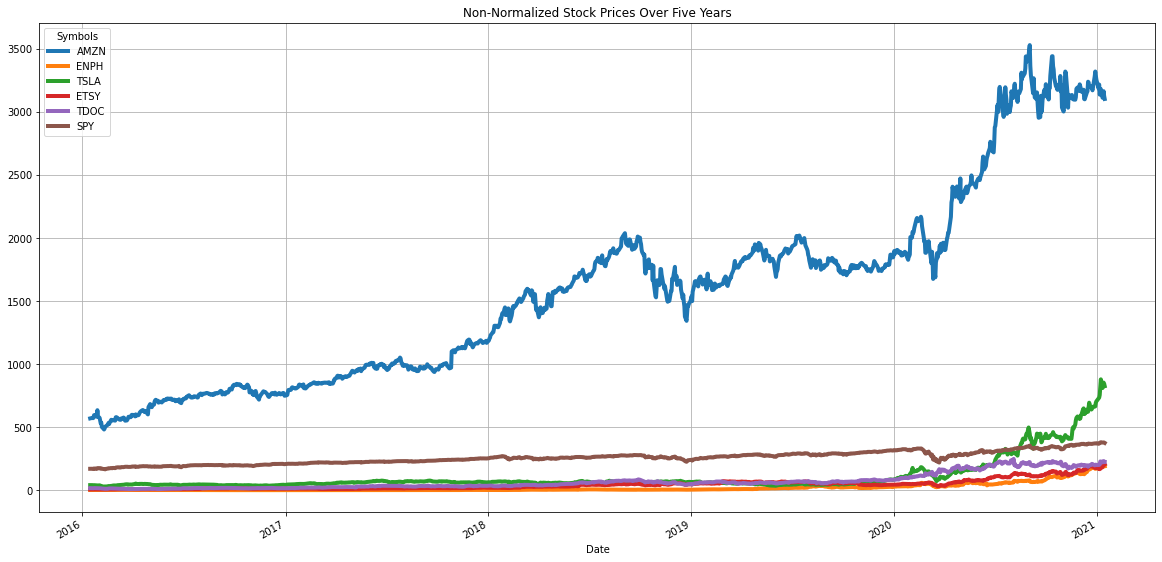

In [4]:
#Using pyplot to look at non-normalized stock price change over time
stockDF.plot(x = 'Date', figsize = (20, 10), linewidth = 4, 
             title = 'Non-Normalized Stock Prices Over Five Years')
plt.grid()
plt.show()

#As you can see, Amazon is way higher than all the others since the prices aren't normalized

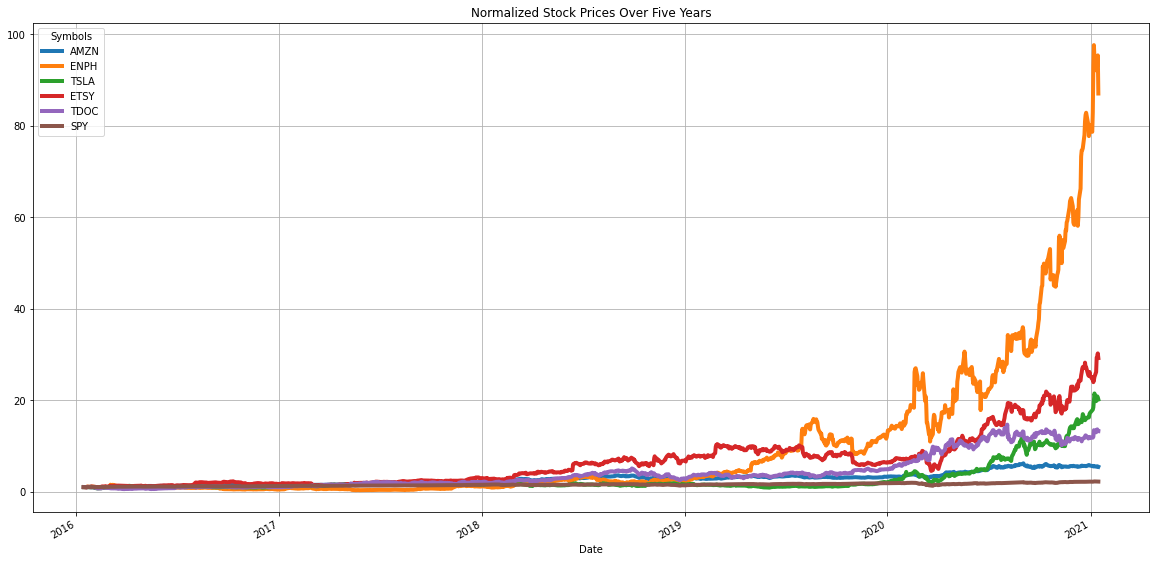

In [5]:
#To make them all start at the same starting point, divide each price by the initial price to show proper returns
normalizedStockDF = stockDF.copy() #Making a copy so swe can still have the old data frame

for i in normalizedStockDF.columns[1:]: #All columns except the date
    normalizedStockDF[i] = normalizedStockDF[i] / normalizedStockDF[i][0]

#Using pyplot to look at normalized stock price change over time
normalizedStockDF.plot(x = 'Date', figsize = (20, 10), linewidth = 4, 
             title = 'Normalized Stock Prices Over Five Years')
plt.grid()
plt.show()

#You can see that you made almost 100x if you put your money in $ENPH at the beginning of 2016

In [6]:
#To make it more interactive, I'll use Plotly to be able to hover over certain points on the graph
interactiveGraphReturns = px.line(title = "Stock Returns Over Five Years") #Specifying we want a line graph

#Looping through the data and adding a scatter trace for each stock
for i in normalizedStockDF.columns[1:]: #Ignoring the date column
    interactiveGraphReturns.add_scatter(x = normalizedStockDF['Date'], y = normalizedStockDF[i], name = i)
    
#Showing the graph
interactiveGraphReturns.show()

#Using the old dataframe to look at prices as well instead of just returns
interactiveGraphPrices = px.line(title = "Stock Prices Over Five Years")

for i in stockDF.columns[1:]:
    interactiveGraphPrices.add_scatter(x = stockDF['Date'], y = stockDF[i], name = i)
    
interactiveGraphPrices.show()

In [7]:
#Creating a function to examine daily changes in stock price
def dailyMovement(stockData):
    dailyMovementDF = stockData.copy() #Making a copy so we don't overwrite our other set
    
    #Looping through each column except the date column
    for i in stockData.columns[1:]:
        
        #Looping through each row
        for j in range(1, len(stockData)): #All rows except the title row
            
            #Calculating percentage change by subtracting the current day from the previous day change
            dailyMovementDF[i][j] = ((stockData[i][j] - stockData[i][j-1]) / stockData[i][j-1]) * 100
            
        #Setting the first row's previous value to 0 since it's non-existent
        dailyMovementDF[i][0] = 0
        
    return dailyMovementDF

#Calling the function
dailyPriceChange = dailyMovement(stockDF)
dailyPriceChange

<ipython-input-7-f5086fd8a162>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-f5086fd8a162>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Symbols       Date      AMZN       ENPH      TSLA       ETSY      TDOC  \
0       2016-01-15  0.000000   0.000000  0.000000   0.000000  0.000000   
1       2016-01-19  0.754146   0.000000 -0.131716  -4.999999 -2.291429   
2       2016-01-20 -0.471724  -6.849319 -2.940598   3.458647 -5.351771   
3       2016-01-21  0.568410  20.588239  0.639149   1.598832  3.811947   
4       2016-01-22  3.714651  -4.065046  1.290191   6.151650  6.731948   
...            ...       ...        ...       ...        ...       ...   
1255    2021-01-11 -2.151946  -2.762649 -7.821415   4.207230 -3.038018   
1256    2021-01-12  0.212578   2.384973  4.715295  12.079328  4.179116   
1257    2021-01-13  1.443841  -1.355999  0.585088   0.916405  0.738840   
1258    2021-01-14 -1.213558   2.523442 -1.101342   2.168770 -2.696406   
1259    2021-01-15 -0.742452  -8.734380 -2.229589  -3.356659 -0.128577   

Symbols       SPY  
0        0.000000  
1        0.133107  
2       -1.281503  
3        0.560206  
4        2.051511  
...           ...  
1255    -0.674083  
1256     0.021122  
1257     0.269298  
1258    -0.350198  
1259    -0.729266  

[1260 rows x 7 columns]

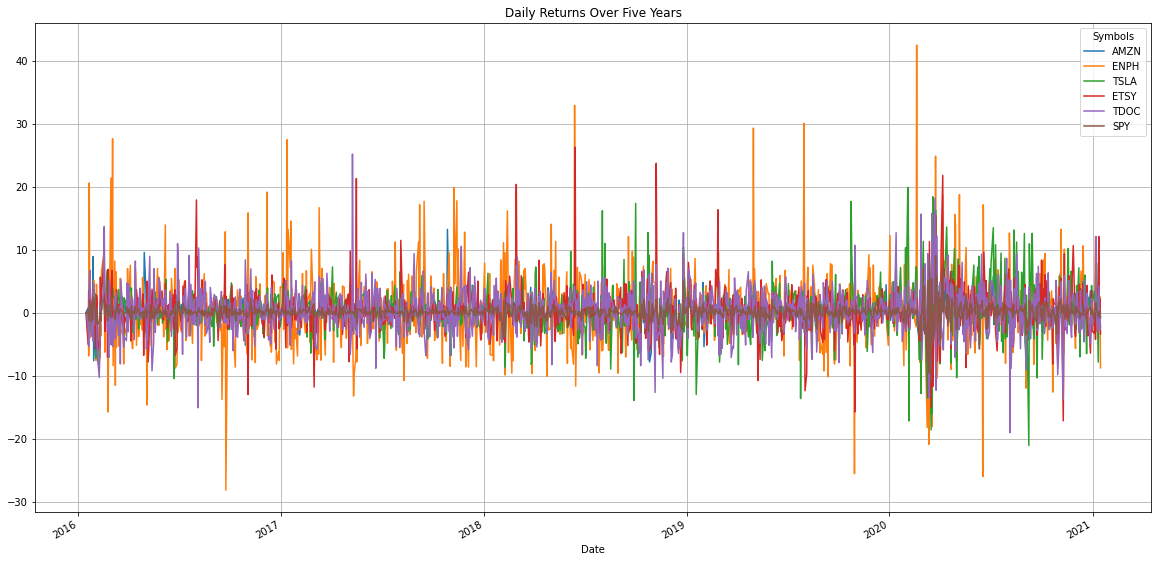

In [8]:
#Now that there's a new dataset to work with, I can visualize it
dailyPriceChange.plot(x = 'Date', figsize = (20,10), title = 'Daily Returns Over Five Years') #Non-interactive
plt.grid()
plt.show()

#Making the graph interactive
interactiveGraphDailyChange = px.line(title = 'Daily Returns Over Five Years')
for i in dailyPriceChange.columns[1:]:
    interactiveGraphDailyChange.add_scatter(x = dailyPriceChange['Date'], y = dailyPriceChange[i], name = i)
interactiveGraphDailyChange.show()

#The graph shows that $ENPH is definitely the most volatile stock as it has the most positive and most negative
#daily price changes. These likely coincide with earnings reports.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

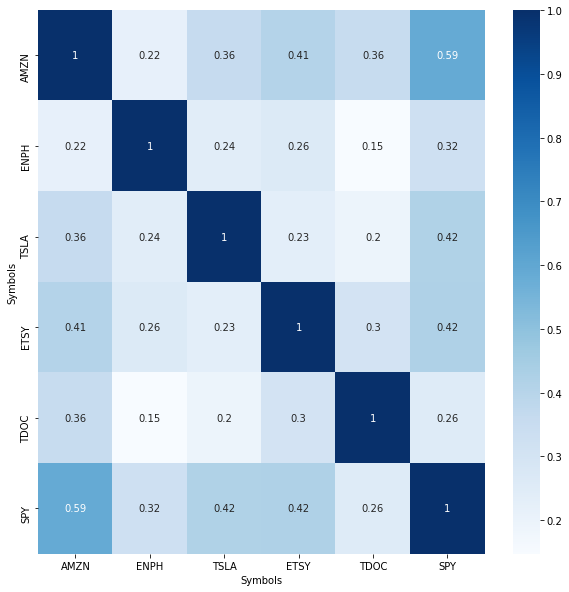

In [9]:
#Using seaborn to make a correlation matrix to see if any stocks have a high correlation in daily movement.
#Guide used: https://pythonbasics.org/seaborn-heatmap/
correlationMatrix = dailyPriceChange.drop(columns = ['Date']).corr() #Getting rid of the date column
plt.figure(figsize = (10,10))
ax = plt.subplot()
sns.heatmap(correlationMatrix, annot = True, ax = ax, cmap = 'Blues')

#The highest correlation is AMZN and SPY and that's likely because Amazon makes up a large part of the S&P500

array([[<AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'ENPH'}>],
       [<AxesSubplot:title={'center':'TSLA'}>,
        <AxesSubplot:title={'center':'ETSY'}>],
       [<AxesSubplot:title={'center':'TDOC'}>,
        <AxesSubplot:title={'center':'SPY'}>]], dtype=object)

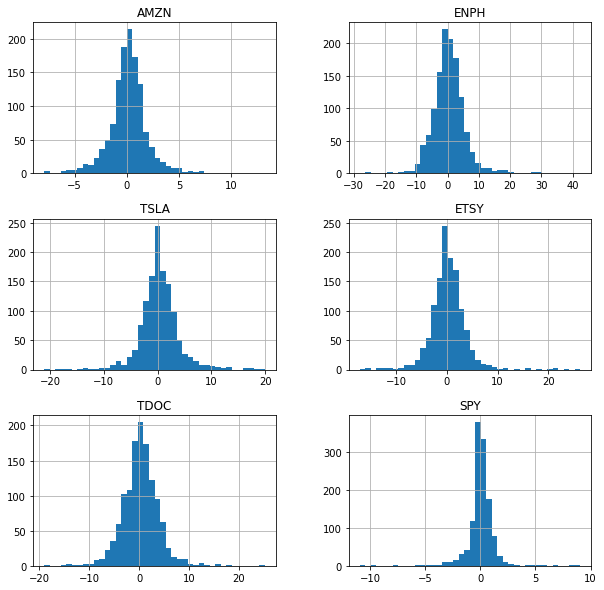

In [10]:
#Histograms are also a good way to show volatily in a stock because a less-volatile stock has a standard deviation
#around zero but more volatile stock can have a higher standard deviation
dailyPriceChange.hist(figsize = (10,10),  bins = 40)

#SPY seems to be the least risky with all the others having higher standard deviations

## Part 2: Technical Analysis
### The objective of this part is to examine multiple technical analysis indicators such as moving averages, MACD, RSI, etc. and understand how they can help make decisions when it comes to buying and selling securities.
### These indicators shouldn't be used exclusively to trade on but they can help provide a better picture of what future movement may look like.

In [11]:
#To examine technical analysis indicators, we'll choose one stock from above and focus solely on it to see how 
#technical indicators play a role in stock movement.
#We will also focus on other data provided by the "get_data_yahoo" function other than just the Adj. Close column.
technicalDF = pdr.get_data_yahoo('ETSY', start = '2016-01-15', end = '2021-01-16')
technicalDF.reset_index(inplace = True)

#It should already be in ascending order by date but using sort_values to confirm.
technicalDF = technicalDF.sort_values(by = ['Date'])
technicalDF

Date        High         Low        Open       Close   Volume  \
0    2016-01-15    7.030000    6.660000    6.930000    7.000000   798800   
1    2016-01-19    7.100000    6.545000    7.060000    6.650000  1425900   
2    2016-01-20    7.000000    6.040000    6.540000    6.880000  1631800   
3    2016-01-21    7.260000    6.710000    6.920000    6.990000  1167300   
4    2016-01-22    7.455000    7.060000    7.110000    7.420000   888300   
...         ...         ...         ...         ...         ...      ...   
1255 2021-01-11  187.759995  171.020004  174.100006  183.039993  3821000   
1256 2021-01-12  211.850006  184.750000  185.059998  205.149994  9358300   
1257 2021-01-13  209.039993  200.869995  204.610001  207.029999  2925000   
1258 2021-01-14  221.119995  207.000000  207.250000  211.520004  5038600   
1259 2021-01-15  211.990005  197.160004  211.210007  204.419998  3601500   

       Adj Close  
0       7.000000  
1       6.650000  
2       6.880000  
3       6.990000  
4       7.420000  
...          ...  
1255  183.039993  
1256  205.149994  
1257  207.029999  
1258  211.520004  
1259  204.419998  

[1260 rows x 7 columns]

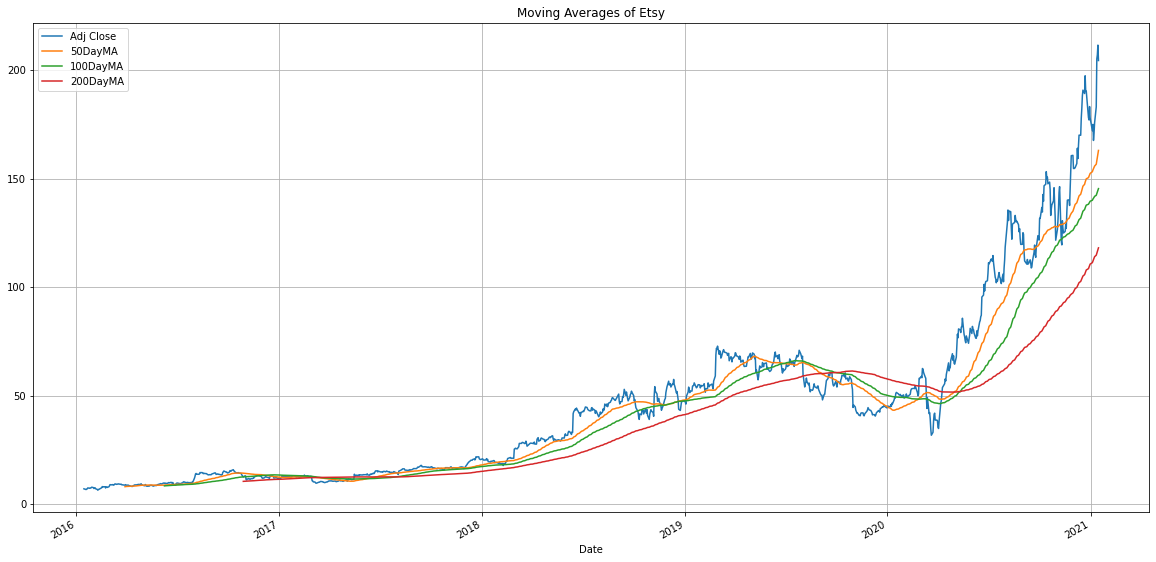

In [12]:
#One of the most popular tehnical indicators is the Simple Moving Average. It's exactly what it sounds like, it's a 
#moving average over a specified period of time. The 3 most popular time frames are the 200-day SMA, 100-day SMA, 
#and 50-day SMA.

#Adding the various moving averages to our dataframe and then plotting it.
technicalDF['50DayMA'] = technicalDF['Adj Close'].transform(lambda x: x.rolling(window = 50).mean())
technicalDF['100DayMA'] = technicalDF['Adj Close'].transform(lambda x: x.rolling(window = 100).mean())
technicalDF['200DayMA'] = technicalDF['Adj Close'].transform(lambda x: x.rolling(window = 200).mean())
technicalDF #The first 50, 100, and 200 rows respectively are blank due to not being able to compute the average 
            #on non-existent data.
    
#Plotting the adjusted close price of Etsy along with the 50, 100, and 200 day moving averages.
technicalDF[['Date', 'Adj Close', '50DayMA', '100DayMA', '200DayMA']].plot(x = 'Date', figsize = (20, 10), 
                                                                    title = 'Moving Averages of Etsy')
plt.grid()
plt.show()

#Whenever the price moves above a moving average, that's typically a "Buy" signal and when it goes below,
#it's a "Sell" signal.

<AxesSubplot:title={'center':'Price of $ETSY Along with the MACD'}, xlabel='Date'>

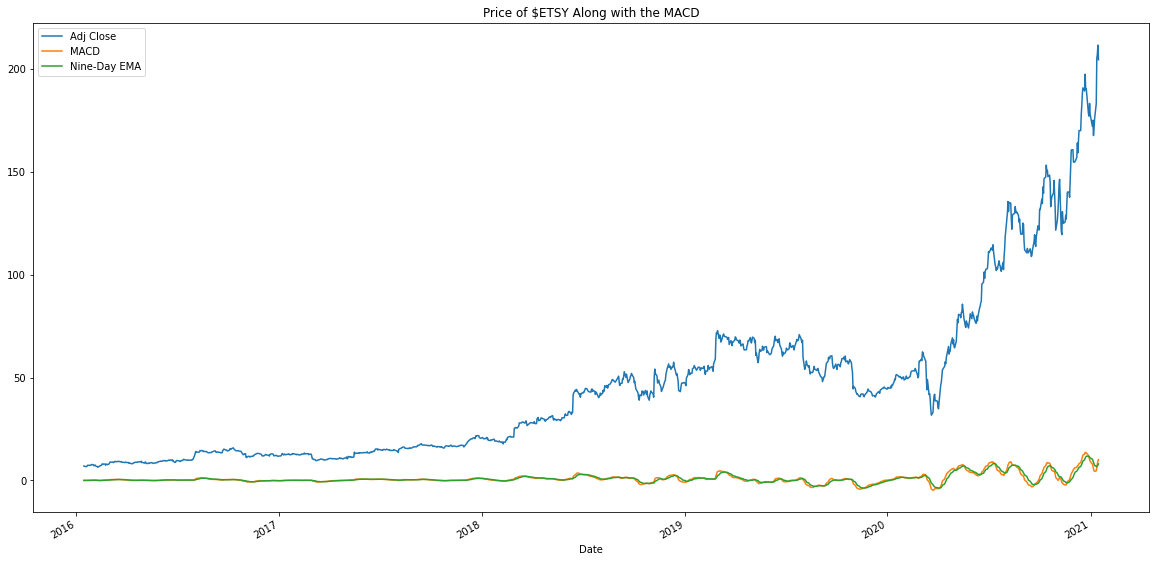

In [13]:
#Another popular technical analysis indicator is the moving average convergence divergence (MACD). MACD is cacluated 
#by subtracting the 12 day exponential moving average from the 26 day EMA. Once the MACD moves above 0 for a 
#sustained period of time, that's a buy signal. When it goes below 0 for a sustained period of time, that's a bearish
#signal.

#For more info on exponential moving averages, check out https://www.investopedia.com/terms/e/ema.asp.
technicalDF['Twelve-Day EMA'] = technicalDF['Adj Close'].ewm(span = 12, adjust = False).mean()
technicalDF['Twenty Six-Day EMA'] = technicalDF['Adj Close'].ewm(span = 26, adjust = False).mean()
technicalDF['MACD'] = technicalDF['Twelve-Day EMA'] - technicalDF['Twenty Six-Day EMA']
technicalDF['Nine-Day EMA'] = technicalDF['MACD'].ewm(span = 9, adjust = False).mean() 
 

#When the MACD crossing the signal line (9 day EMA), it's a bullish signal and when it falls below, it's 
#a bearish signal.
technicalDF[['Date', 'Adj Close', 'MACD', 'Nine-Day EMA']].plot(x = 'Date', figsize = (20, 10), 
                                                                    title = 'Price of $ETSY Along with the MACD')

<AxesSubplot:title={'center':'MACD and Signal Line'}, xlabel='Date'>

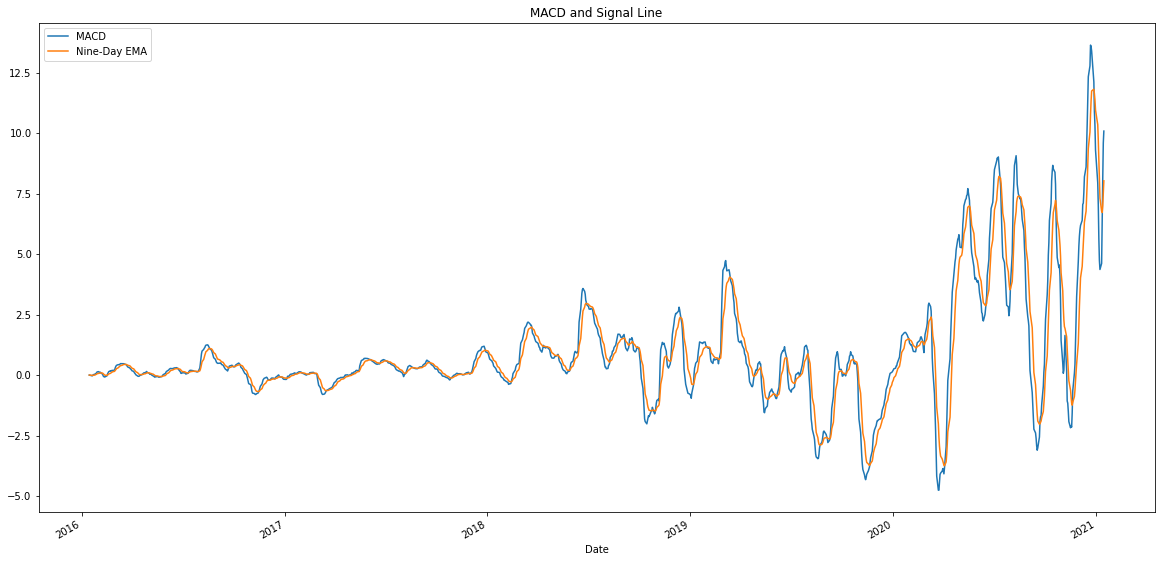

In [14]:
#Looking at just the MACD and signal line to get a better look
technicalDF[['Date', 'MACD', 'Nine-Day EMA']].plot(x = 'Date', figsize = (20, 10), 
                                                                    title = 'MACD and Signal Line')

In [15]:
#The next indicator to look at is the relative strength index (RSI). It ranges from 0-100 and when it's above 70,
#it indicates that the stock may be overbought and due for a correction or is simply just having a very strong uptrend.
#When it goes below 30, the stocck may be oversold and due for a comeback.

#For more information on how the RSI is calculated, check out https://www.investopedia.com/terms/r/rsi.asp
def RSI(dataframe, timeWindow):
    priceDifference = dataframe.diff(1).dropna()
    positiveChange = priceDifference * 0
    negativeChange = priceDifference * 0 #Initializing the values

    #If the difference in price is positive, accept it, otherwise the value is 0.
    positiveChange[priceDifference > 0] = priceDifference[priceDifference > 0]
    #If the difference in price is negative, accept it, otherwise the value is 0.
    negativeChange[priceDifference < 0] = priceDifference[priceDifference < 0]

    #Calculating the EMA for 14 days
    positiveAverage = positiveChange.ewm(com = timeWindow - 1, min_periods = timeWindow).mean()
    negativeAverage = negativeChange.ewm(com = timeWindow - 1, min_periods = timeWindow).mean()
    #Calculating the relative strength (average gain / average loss)
    relativeStrength = abs(positiveAverage / negativeAverage)
    
    #Implementing the RSI formula
    RSI = 100 - (100 / (1 + relativeStrength))
    return RSI

#Adding the RSI column to the dataframe
technicalDF['RSI'] = RSI(technicalDF['Adj Close'], 14)
technicalDF

Date        High         Low        Open       Close   Volume  \
0    2016-01-15    7.030000    6.660000    6.930000    7.000000   798800   
1    2016-01-19    7.100000    6.545000    7.060000    6.650000  1425900   
2    2016-01-20    7.000000    6.040000    6.540000    6.880000  1631800   
3    2016-01-21    7.260000    6.710000    6.920000    6.990000  1167300   
4    2016-01-22    7.455000    7.060000    7.110000    7.420000   888300   
...         ...         ...         ...         ...         ...      ...   
1255 2021-01-11  187.759995  171.020004  174.100006  183.039993  3821000   
1256 2021-01-12  211.850006  184.750000  185.059998  205.149994  9358300   
1257 2021-01-13  209.039993  200.869995  204.610001  207.029999  2925000   
1258 2021-01-14  221.119995  207.000000  207.250000  211.520004  5038600   
1259 2021-01-15  211.990005  197.160004  211.210007  204.419998  3601500   

       Adj Close     50DayMA    100DayMA    200DayMA  Twelve-Day EMA  \
0       7.000000         NaN         NaN         NaN        7.000000   
1       6.650000         NaN         NaN         NaN        6.946154   
2       6.880000         NaN         NaN         NaN        6.935976   
3       6.990000         NaN         NaN         NaN        6.944288   
4       7.420000         NaN         NaN         NaN        7.017474   
...          ...         ...         ...         ...             ...   
1255  183.039993  156.624199  142.295799  114.686225      176.962109   
1256  205.149994  158.078799  143.035999  115.518625      181.298707   
1257  207.029999  159.787599  143.805399  116.360425      185.257367   
1258  211.520004  161.489199  144.616899  117.225825      189.297773   
1259  204.419998  162.968599  145.373699  118.070675      191.624269   

      Twenty Six-Day EMA       MACD  Nine-Day EMA        RSI  
0               7.000000   0.000000      0.000000        NaN  
1               6.974074  -0.027920     -0.005584        NaN  
2               6.967106  -0.031129     -0.010693        NaN  
3               6.968802  -0.024514     -0.013457        NaN  
4               7.002224   0.015251     -0.007716        NaN  
...                  ...        ...           ...        ...  
1255          172.350013   4.612096      6.768821  58.599192  
1256          174.779641   6.519066      6.718870  69.136458  
1257          177.168557   8.088811      6.992858  69.839391  
1258          179.713108   9.584665      7.511220  71.508397  
1259          181.543248  10.081021      8.025180  65.350102  

[1260 rows x 15 columns]

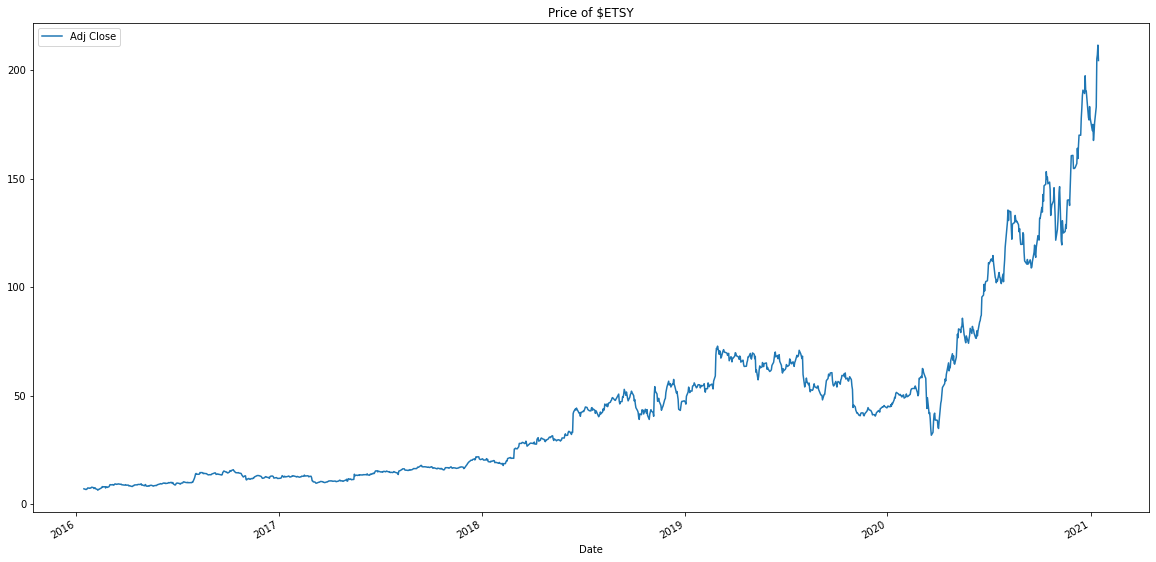

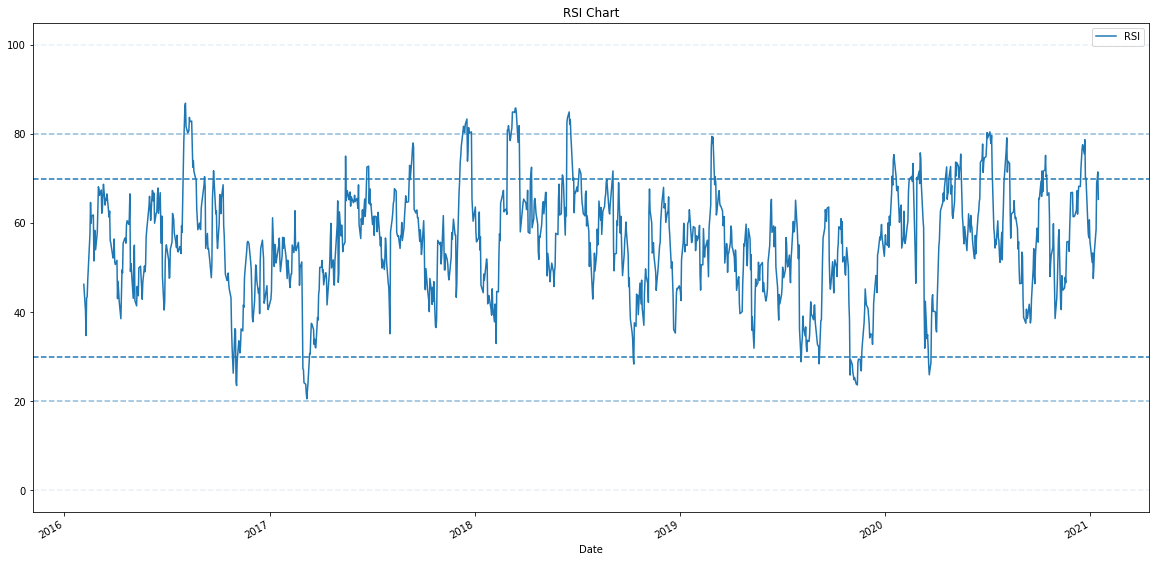

In [16]:
#Plotting two graphs: one of the price of Etsy and one of the RSI along with key thresholds
technicalDF[['Date', 'Adj Close']].plot(x = 'Date', figsize = (20, 10), 
                                               title = 'Price of $ETSY')
plt.show()

technicalDF[['Date', 'RSI']].plot(x = 'Date', figsize = (20, 10), 
                                  title = 'RSI Chart')

#Adding lines for key thresholds
plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')
plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.show()

In [17]:
#The last technical indicator to look at is On-Balance Volume. This indicator looks at cumulative volume of buying
#and selling. Ideally, a rising on balance volume should indicate a rising price. If the volume is increasing but
#the price is staying flat, that may be indicative that the stock is reaching a top.

#Creating a function to calculate OBV
def OBV(dataframe):
    OBV = []
    OBV.append(0) #Initializing an empty list with the first value being 0 (since there's no volume yet)
    
    #Looping through the data and calculating a cumulative volume if it increases and decreasing it when necessary
    for i in range(1, len(dataframe)):
        if dataframe[i] > dataframe[i - 1]: #If the volume is higher than the previous day
            OBV.append(OBV[-1] + dataframe[i]) #Add the previous volume to current volume
        elif dataframe[i] < dataframe[i -1]: #If the volume is lower than the previous day
            OBV.append(OBV[-1] - dataframe[1]) #Subtract the current volume from yesterday's volume
        else:
            OBV.append(OBV[-1])
    return OBV

#Adding a new column to the dataframe for the on-balance volume
technicalDF['OBV'] = OBV(technicalDF['Volume'])
#Also adding a column for a 21 day OBV EMA to see if the current volume is better or worse than the average volume
technicalDF['OBV_21DayEMA'] = technicalDF['OBV'].ewm(span = 21).mean()
technicalDF

Date        High         Low        Open       Close   Volume  \
0    2016-01-15    7.030000    6.660000    6.930000    7.000000   798800   
1    2016-01-19    7.100000    6.545000    7.060000    6.650000  1425900   
2    2016-01-20    7.000000    6.040000    6.540000    6.880000  1631800   
3    2016-01-21    7.260000    6.710000    6.920000    6.990000  1167300   
4    2016-01-22    7.455000    7.060000    7.110000    7.420000   888300   
...         ...         ...         ...         ...         ...      ...   
1255 2021-01-11  187.759995  171.020004  174.100006  183.039993  3821000   
1256 2021-01-12  211.850006  184.750000  185.059998  205.149994  9358300   
1257 2021-01-13  209.039993  200.869995  204.610001  207.029999  2925000   
1258 2021-01-14  221.119995  207.000000  207.250000  211.520004  5038600   
1259 2021-01-15  211.990005  197.160004  211.210007  204.419998  3601500   

       Adj Close     50DayMA    100DayMA    200DayMA  Twelve-Day EMA  \
0       7.000000         NaN         NaN         NaN        7.000000   
1       6.650000         NaN         NaN         NaN        6.946154   
2       6.880000         NaN         NaN         NaN        6.935976   
3       6.990000         NaN         NaN         NaN        6.944288   
4       7.420000         NaN         NaN         NaN        7.017474   
...          ...         ...         ...         ...             ...   
1255  183.039993  156.624199  142.295799  114.686225      176.962109   
1256  205.149994  158.078799  143.035999  115.518625      181.298707   
1257  207.029999  159.787599  143.805399  116.360425      185.257367   
1258  211.520004  161.489199  144.616899  117.225825      189.297773   
1259  204.419998  162.968599  145.373699  118.070675      191.624269   

      Twenty Six-Day EMA       MACD  Nine-Day EMA        RSI         OBV  \
0               7.000000   0.000000      0.000000        NaN           0   
1               6.974074  -0.027920     -0.005584        NaN     1425900   
2               6.967106  -0.031129     -0.010693        NaN     3057700   
3               6.968802  -0.024514     -0.013457        NaN     1631800   
4               7.002224   0.015251     -0.007716        NaN      205900   
...                  ...        ...           ...        ...         ...   
1255          172.350013   4.612096      6.768821  58.599192  1003746200   
1256          174.779641   6.519066      6.718870  69.136458  1013104500   
1257          177.168557   8.088811      6.992858  69.839391  1011678600   
1258          179.713108   9.584665      7.511220  71.508397  1016717200   
1259          181.543248  10.081021      8.025180  65.350102  1015291300   

      OBV_21DayEMA  
0     0.000000e+00  
1     7.469000e+05  
2     1.591634e+06  
3     1.603153e+06  
4     1.268069e+06  
...            ...  
1255  9.936407e+08  
1256  9.954102e+08  
1257  9.968891e+08  
1258  9.986917e+08  
1259  1.000201e+09  

[1260 rows x 17 columns]

<AxesSubplot:title={'center':'On-Balance Volume(OBV) with the 21-Day OBV Average'}, xlabel='Date'>

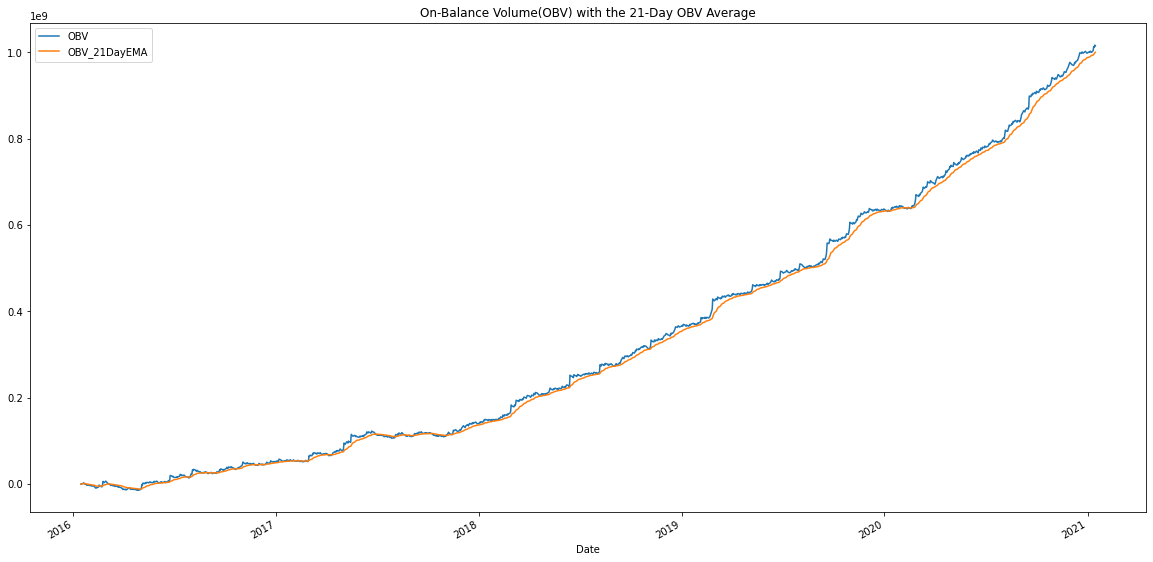

In [18]:
#Plotting the OBV and the 21 day OBV EMA. When the OBV passes the EMA, that can be considered a buy signal.
#When the OBV falls below the EMA, it's considered a sell signal.
technicalDF[['Date', 'OBV', 'OBV_21DayEMA']].plot(x = 'Date', figsize = (20, 10), 
                                                  title = 'On-Balance Volume(OBV) with the 21-Day OBV Average')